In [1]:
import pandas as pd
import matplotlib.pyplot as plt
price = pd.read_csv('./양파_월별_가격.csv')
price

,년도,월,가격
0,2000,1,479
1,2000,2,516
2,2000,3,744
3,2000,4,953
4,2000,5,616
...,...,...,...
235,2019,8,500
236,2019,9,539
237,2019,10,521
238,2019,11,605


In [2]:
o00 = pd.read_excel('./양파_공급량/onion_00.xlsx')
o01 = pd.read_excel('./양파_공급량/onion_01.xlsx')
o02 = pd.read_excel('./양파_공급량/onion_02.xlsx')
o03 = pd.read_excel('./양파_공급량/onion_03.xlsx')
o04 = pd.read_excel('./양파_공급량/onion_04.xlsx')
o05 = pd.read_excel('./양파_공급량/onion_05.xlsx')
o06 = pd.read_excel('./양파_공급량/onion_06.xlsx')
o07 = pd.read_excel('./양파_공급량/onion_07.xlsx')
o08 = pd.read_excel('./양파_공급량/onion_08.xlsx')
o09 = pd.read_excel('./양파_공급량/onion_09.xlsx')
o10 = pd.read_excel('./양파_공급량/onion_10.xlsx')
o11 = pd.read_excel('./양파_공급량/onion_11.xlsx')
o12 = pd.read_excel('./양파_공급량/onion_12.xlsx')
o13 = pd.read_excel('./양파_공급량/onion_13.xlsx')
o14 = pd.read_excel('./양파_공급량/onion_14.xlsx')
o15 = pd.read_excel('./양파_공급량/onion_15.xlsx')
o16 = pd.read_excel('./양파_공급량/onion_16.xlsx')
o17 = pd.read_excel('./양파_공급량/onion_17.xlsx')
o18 = pd.read_excel('./양파_공급량/onion_18.xlsx')
o19 = pd.read_excel('./양파_공급량/onion_19.xlsx')
# o20 = pd.read_excel('./onion_20.xlsx')

onion = pd.concat([o00, o01, o02, o03, o04, o05, o06, o07, o08, o09, o10, o11, o12, o13, o14, o15, o16, o17, o18, o19])
# onion = onion[2:]
onion

,거래년월일,품목명,시장코드,시장명,출하지코드,출하지명,거래량,품목코드
0,총 합계,전체,NaN,NaN,NaN,NaN,"109,008,214",NaN
1,소계,양파(일반),NaN,NaN,NaN,NaN,"109,008,214",120101.0
2,20001230,양파(일반),110001.0,서울가락도매시장,232000,강원도평창군,"6,960",120101.0
3,20001230,양파(일반),110001.0,서울가락도매시장,770000,경상북도영천시,"29,090",120101.0
4,20001230,양파(일반),110001.0,서울가락도매시장,525000,전라남도함평군,"40,731",120101.0
...,...,...,...,...,...,...,...,...
20562,20190103,양파(일반),230003.0,인천삼산도매시장,534800,전라남도무안군무안읍,"14,350",120101.0
20563,20190103,양파(일반),230003.0,인천삼산도매시장,635820,경상남도창녕군대지면,"15,400",120101.0
20564,20190103,양파(일반),230003.0,인천삼산도매시장,525000,전라남도함평군,"19,200",120101.0
20565,20190103,양파(일반),230003.0,인천삼산도매시장,635000,경상남도창녕군,"13,280",120101.0


In [3]:
# onion[onion.apply( lambda x : print(str(x['거래년월일'])[:6]), axis=1)]
onion['year'] = onion['거래년월일'].apply(lambda x: str(x)[:4]).astype(str)
onion['month'] = onion['거래년월일'].apply(lambda x: str(x)[4:6]).astype(str)
onion['거래량'] = onion['거래량'].apply(lambda x: ''.join(str(x).split(','))).astype(int) 
df = onion[['year', 'month','거래량']]

In [4]:
# for i in year_list:
total = df.groupby(['year','month'], as_index=False).sum()
total

,year,month,거래량
0,2000,01,4088280
1,2000,02,3557610
2,2000,03,4605658
3,2000,04,11877910
4,2000,05,20421827
...,...,...,...
237,2019,10,13598455
238,2019,11,12481686
239,2019,12,12769215
240,소계,,2626630426


In [5]:
total = total[:-2]

In [6]:
cat = pd.concat([price, total], axis=1)
cat.tail(10)

,년도,월,가격,year,month,거래량
230,2019,3,673,2019,03,12972633
231,2019,4,868,2019,04,16234891
232,2019,5,658,2019,05,19802702
233,2019,6,485,2019,06,23532282
234,2019,7,423,2019,07,11792515
235,2019,8,500,2019,08,11930394
236,2019,9,539,2019,09,12329636
237,2019,10,521,2019,10,13598455
238,2019,11,605,2019,11,12481686
239,2019,12,749,2019,12,12769215


In [7]:
result = cat[['year','month','거래량','가격']]
result

,year,month,거래량,가격
0,2000,01,4088280,479
1,2000,02,3557610,516
2,2000,03,4605658,744
3,2000,04,11877910,953
4,2000,05,20421827,616
...,...,...,...,...
235,2019,08,11930394,500
236,2019,09,12329636,539
237,2019,10,13598455,521
238,2019,11,12481686,605


In [8]:
result.groupby('year').corr()


거래량        가격
year                        
2000 거래량  1.000000 -0.048555
     가격  -0.048555  1.000000
2001 거래량  1.000000 -0.614752
     가격  -0.614752  1.000000
2002 거래량  1.000000 -0.800802
     가격  -0.800802  1.000000
2003 거래량  1.000000 -0.148720
     가격  -0.148720  1.000000
2004 거래량  1.000000 -0.701445
     가격  -0.701445  1.000000
2005 거래량  1.000000  0.115732
     가격   0.115732  1.000000
2006 거래량  1.000000 -0.411398
     가격  -0.411398  1.000000
2007 거래량  1.000000 -0.494498
     가격  -0.494498  1.000000
2008 거래량  1.000000 -0.432081
     가격  -0.432081  1.000000
2009 거래량  1.000000 -0.094541
     가격  -0.094541  1.000000
2010 거래량  1.000000  0.181768
     가격   0.181768  1.000000
2011 거래량  1.000000 -0.729797
     가격  -0.729797  1.000000
2012 거래량  1.000000 -0.538317
     가격  -0.538317  1.000000
2013 거래량  1.000000 -0.162163
     가격  -0.162163  1.000000
2014 거래량  1.000000 -0.602738
     가격  -0.602738  1.000000
2015 거래량  1.000000 -0.707700
     가격  -0.707700  1.000000
2016 거래량  1.000000 -0.335356
     가격  -0.335356  1.000000
2017 거래량  1.000000 -0.694133
     가격  -0.694133  1.000000
2018 거래량  1.000000 -0.436600
     가격  -0.436600  1.000000
2019 거래량  1.000000  0.043307
     가격   0.043307  1.000000

In [9]:
cor_result = {'2000':-0.485, '2001':-0.614, '2002':-0.800, '2003':-0.148, '2004':-0.701, '2005':0.115, '2006':-0.411,
              '2007':-0.494, '2008':-0.432, '2009':-0.094, '2010':0.181,'2011':-0.729,'2012':-0.538,'2013':-0.162,
              '2014':-0.602,'2015':-0.707,'2016':-0.335,'2017':-0.694,'2018':-0.436,'2019':0.043}
cor_result

{'2000': -0.485,
 '2001': -0.614,
 '2002': -0.8,
 '2003': -0.148,
 '2004': -0.701,
 '2005': 0.115,
 '2006': -0.411,
 '2007': -0.494,
 '2008': -0.432,
 '2009': -0.094,
 '2010': 0.181,
 '2011': -0.729,
 '2012': -0.538,
 '2013': -0.162,
 '2014': -0.602,
 '2015': -0.707,
 '2016': -0.335,
 '2017': -0.694,
 '2018': -0.436,
 '2019': 0.043}

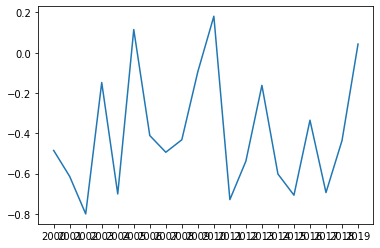

In [10]:
dates = list(cor_result.keys())          
prices = list(cor_result.values())       
plt.plot_date(dates, prices, '-') 

In [11]:
sorted_cor = {k: v for k, v in sorted(cor_result.items(), key=lambda item: item[1])}
sorted_cor

{'2002': -0.8,
 '2011': -0.729,
 '2015': -0.707,
 '2004': -0.701,
 '2017': -0.694,
 '2001': -0.614,
 '2014': -0.602,
 '2012': -0.538,
 '2007': -0.494,
 '2000': -0.485,
 '2018': -0.436,
 '2008': -0.432,
 '2006': -0.411,
 '2016': -0.335,
 '2013': -0.162,
 '2003': -0.148,
 '2009': -0.094,
 '2019': 0.043,
 '2005': 0.115,
 '2010': 0.181}

{'s_m': 4, 'm_m': 9, 'w_m': 4, 'w_p': 3, 'm_p': 0, 's_p': 0}


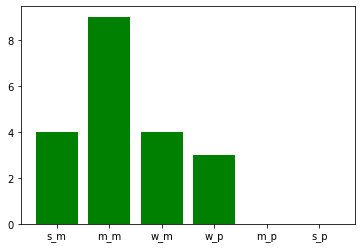

In [13]:
cor_dict = {'s_m':0, 'm_m':0, 'w_m':0, 'w_p':0, 'm_p':0, 's_p':0}
for key, value in sorted_cor.items():
    if value < -0.7:
        cor_dict['s_m'] += 1
    elif -0.7 <= value and value < -0.4:
        cor_dict['m_m'] += 1
    elif -0.4 <= value and value < 0:
        cor_dict['w_m'] += 1
    elif 0 <= value and value < 0.4:
        cor_dict['w_p'] += 1
    elif 0.4 <= value and value < 0.7:
        cor_dict['m_p'] += 1
    else:
        cor_dict['s_p'] += 1
plt.bar(cor_dict.keys(), cor_dict.values(), color='g')
print(cor_dict)